# Monopoly OCR

An Open-CV project to create a dashboard for the monopoly game. 
A screenshot of the game results is added to the resources folder and the script runs an OCR using Open-CV and pyTesseract.


In [2]:
import pytesseract
from PIL import Image
import cv2
import sys
import pandas as pd
import csv
import os

# 1 - Testing for latest files

In [3]:
#Testing conditions
test = False
if test:
    latestCSV = "latest_test.csv"
    dataCSV = "data_test.csv"
    rankCSV = "rank_test.csv"
else:
    latestCSV = "latest.csv"
    dataCSV = "data.csv"
    rankCSV = "rank.csv"

#Check latest file.
check = pd.read_csv(latestCSV)
latest_file = check.iloc[0,0]

In [5]:
def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files if basename.endswith('.jpg')]
    return max(paths, key=os.path.getctime)
print(newest("resources"))
latest = pd.DataFrame([newest("resources")])
latest.to_csv(latestCSV,index = False)
if latest_file == newest("resources"):
    sys.exit("Item has been appended")

else:
    print("This will be appended")

resources\Screenshot_20200702-173925 - Copy (2).jpg
This will be appended


# 2 - Read latest file.

In [6]:
file_path= newest("resources")
im = Image.open(file_path)
im.save("raw.jpg", dpi=(300, 300))

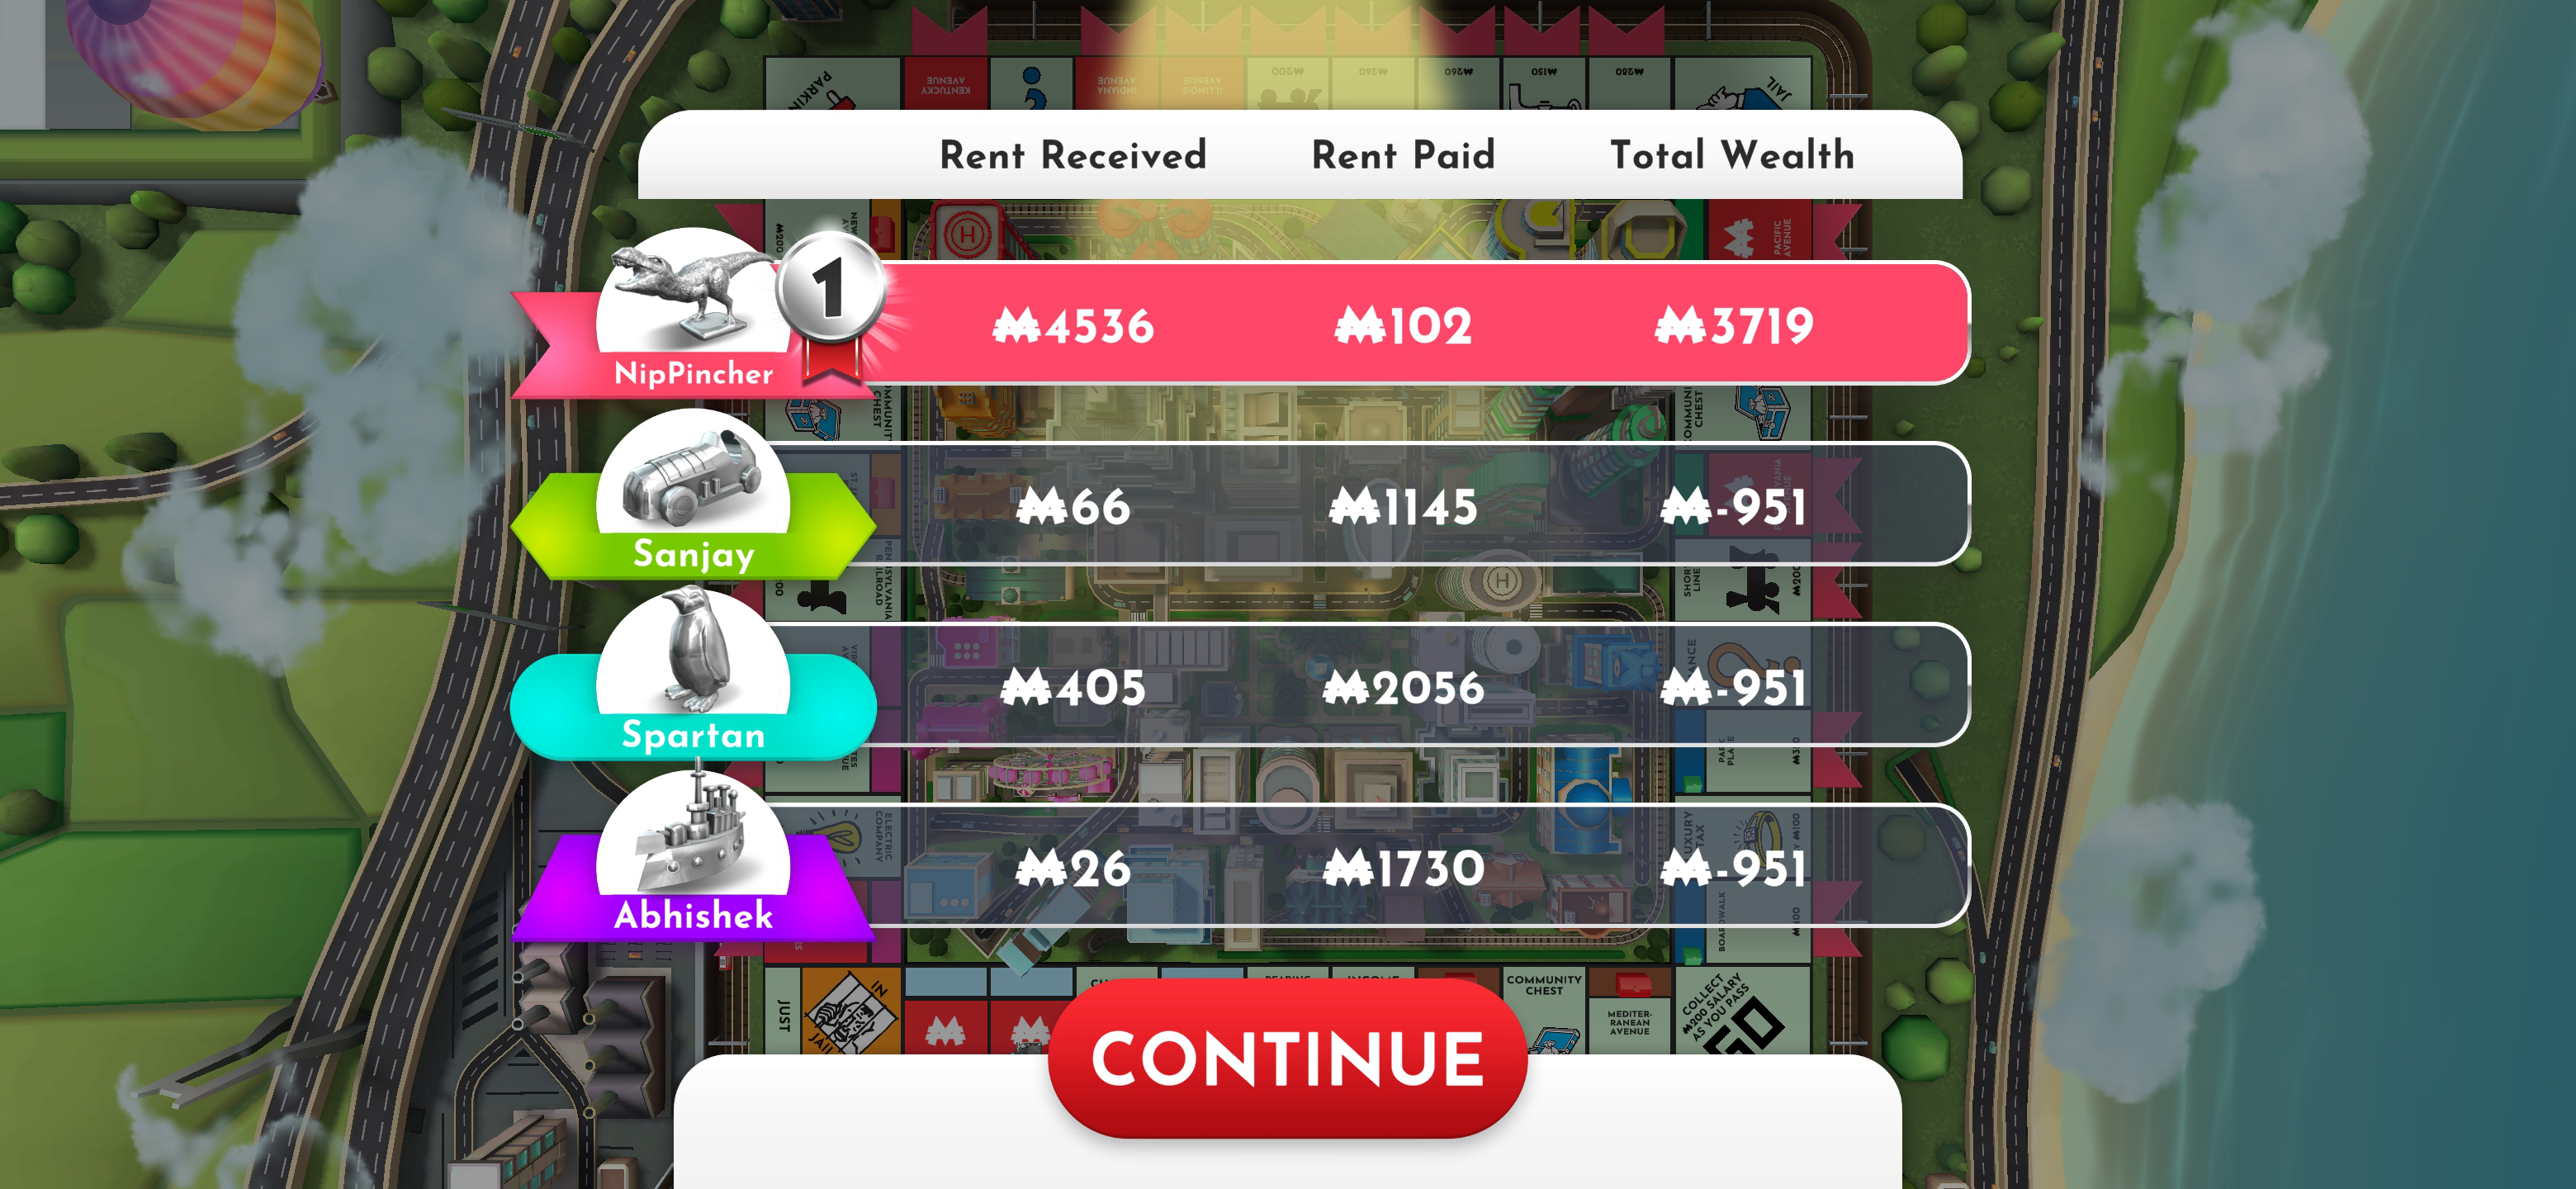

In [7]:
im

# 3 - Pre-process images

In [9]:
#Make image b&w.
im = Image.open("raw.jpg").convert("L")
im.save("bw.jpg")
readImage = cv2.imread("bw.jpg")

#Invert colour chanels.
invertImage = cv2.bitwise_not(readImage)

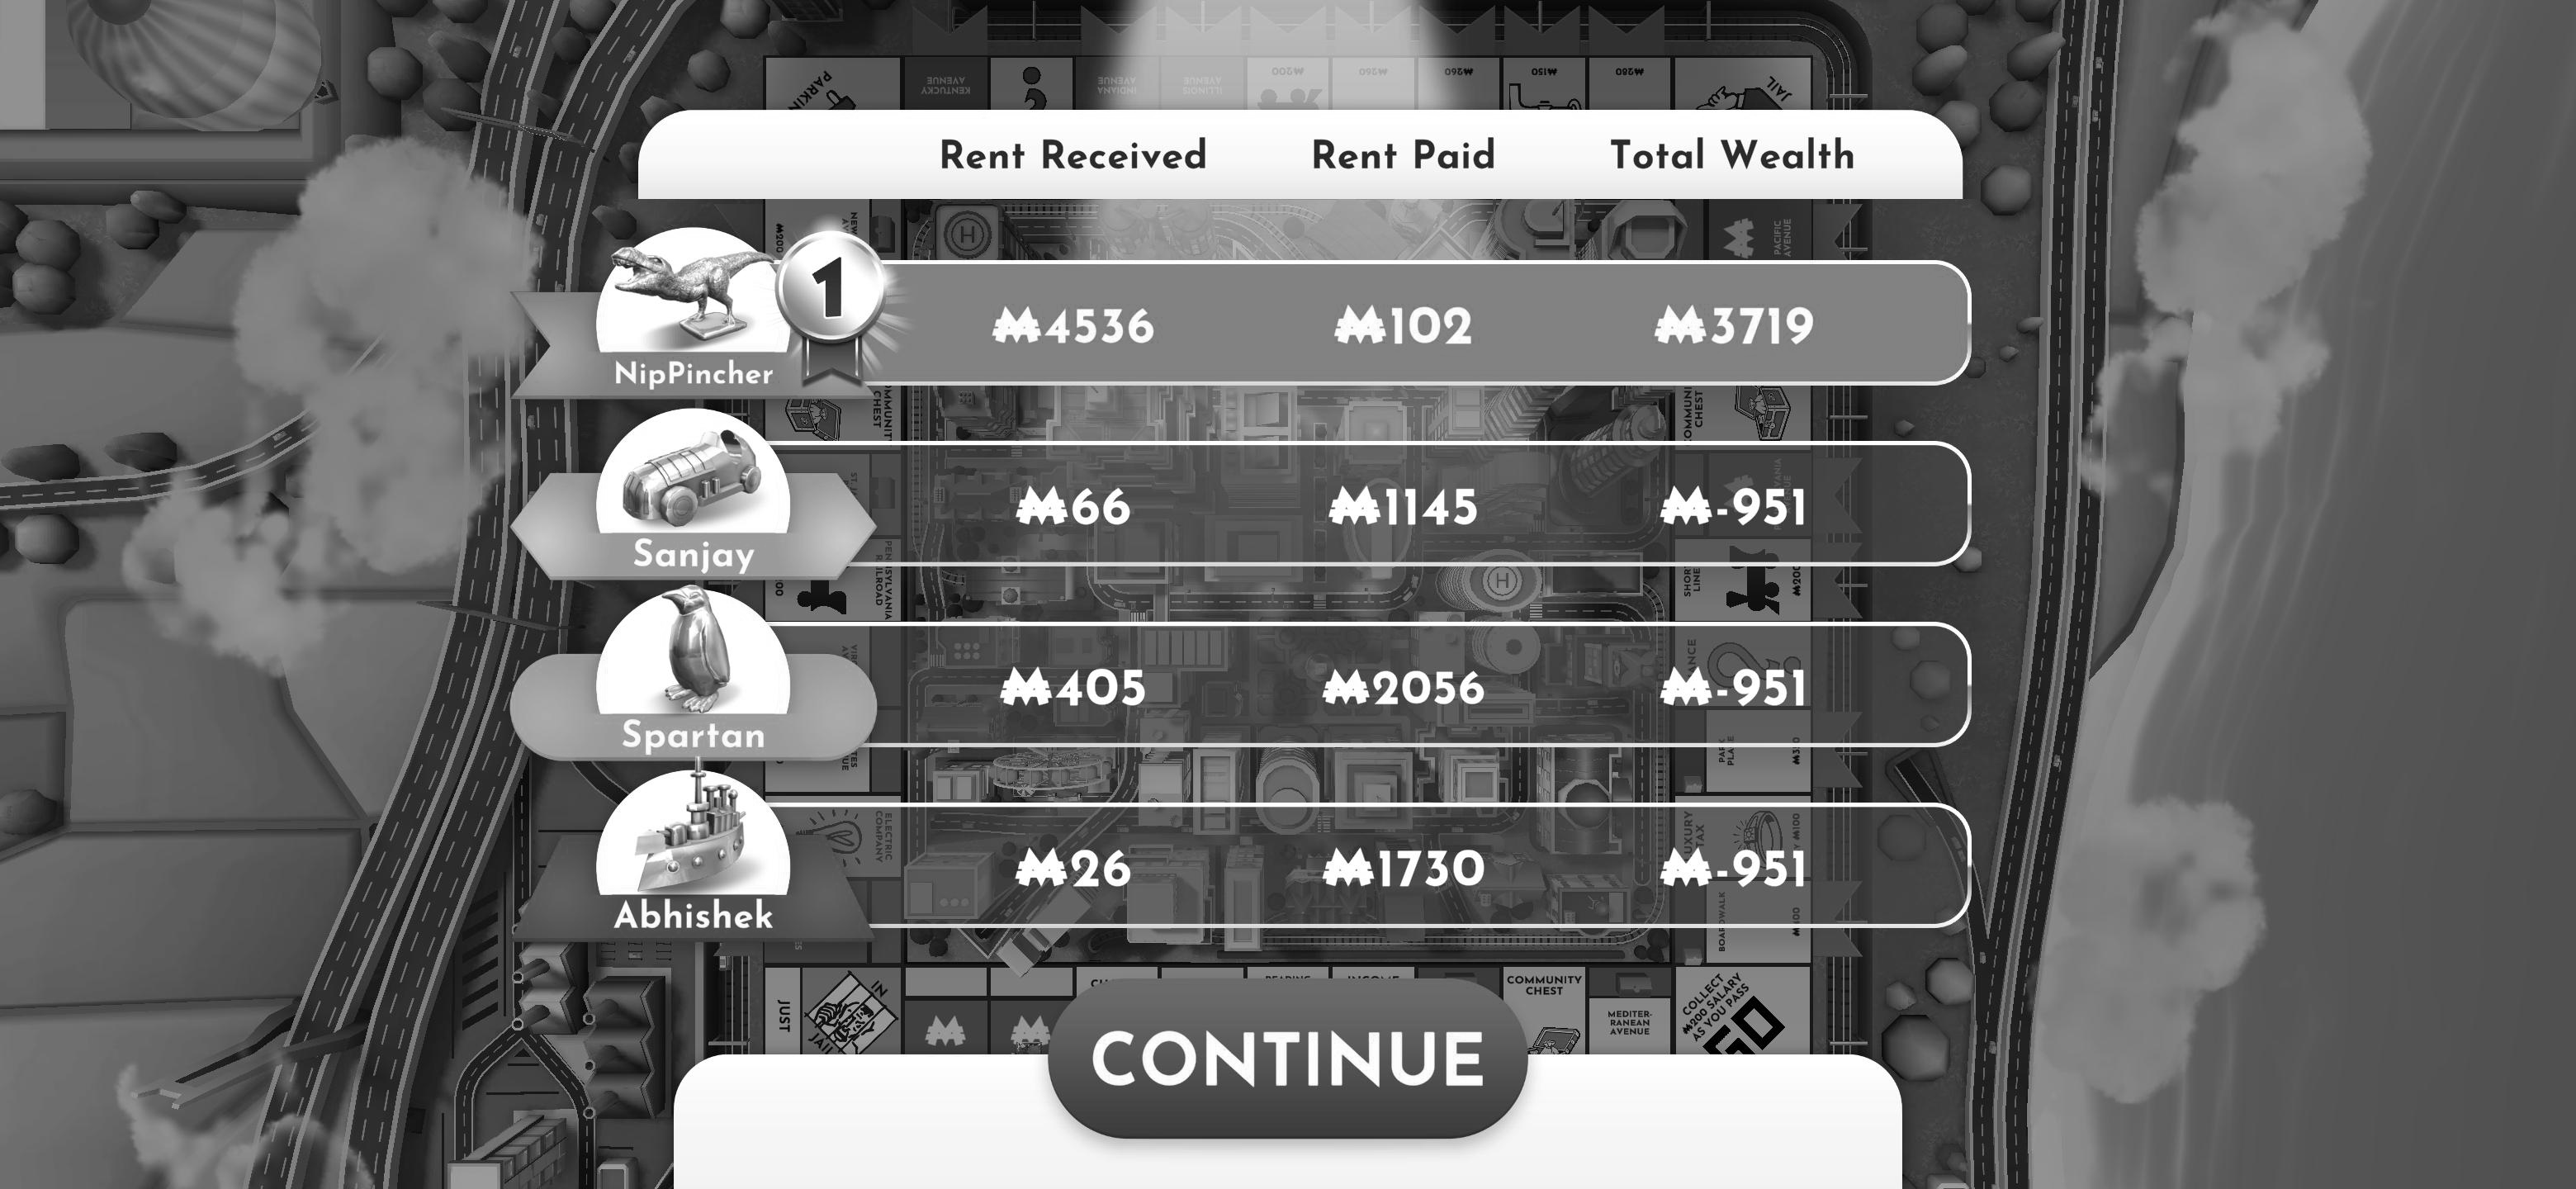

In [11]:
im

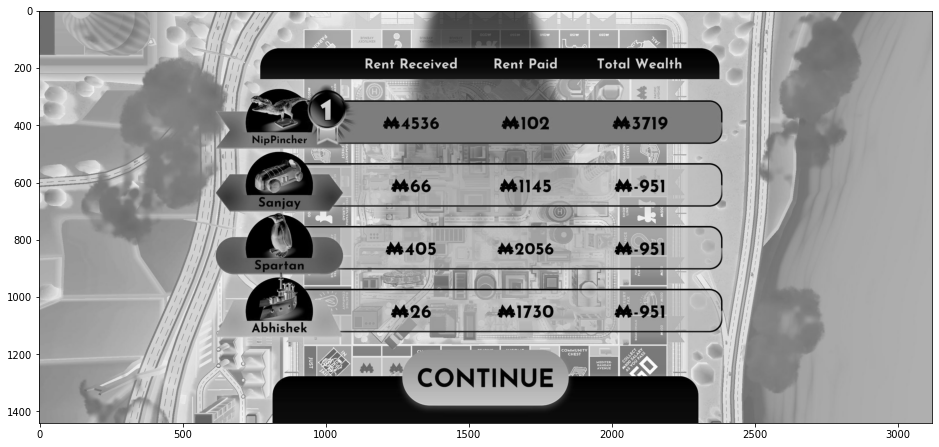

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))
img2 = invertImage[:,:,::-1]
ax.imshow(img2)

# 4 - Crop-dimensions to extract the four player names from inverted image.

In [29]:
cropName_1 = invertImage[428:478,683:970]
cropName_2 = invertImage[645:700,683:970]
cropName_3 = invertImage[869:918,683:970]
cropName_4 = invertImage[1086:1136,683:970]

#Global Crop width for wealth except first value.
wStart = 2085
wEnd = 2225

#Global variables for threshold value.
tn = 25
tw = 28

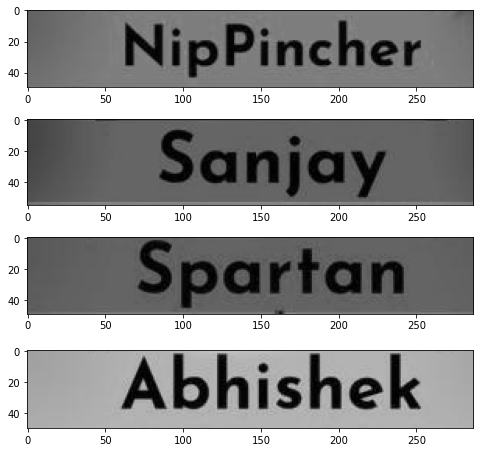

In [42]:
cropList = [cropName_1,cropName_2,cropName_3,cropName_4]
def plotImages(list):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 1
    rows = 4
    for i in range(1, columns*rows +1):
        img = list[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
plotImages(cropList)

# 5 - Crop dimensions for four player wealths.

In [40]:
cropWealth_1 = invertImage[360:430,2065:wEnd]
cropWealth_2 = invertImage[570:655,wStart:wEnd]
cropWealth_3 = invertImage[790:870,wStart:wEnd]
cropWealth_4 = invertImage[1010:1100,wStart:wEnd]

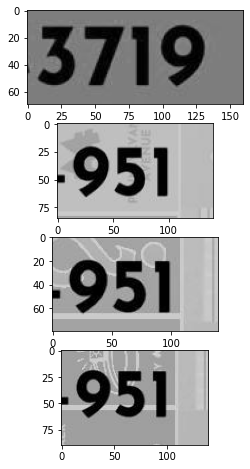

In [43]:
cropList = [cropWealth_1,cropWealth_2,cropWealth_3,cropWealth_4]
plotImages(cropList)

# 6 - Change threshhold for names.

In [45]:
retval, thresholdName_1 = cv2.threshold(cropName_1,tn,255,cv2.THRESH_BINARY)
retval, thresholdName_2 = cv2.threshold(cropName_2,tn,255,cv2.THRESH_BINARY)
retval, thresholdName_3 = cv2.threshold(cropName_3,tn,255,cv2.THRESH_BINARY)
retval, thresholdName_4 = cv2.threshold(cropName_4,tn,255,cv2.THRESH_BINARY)


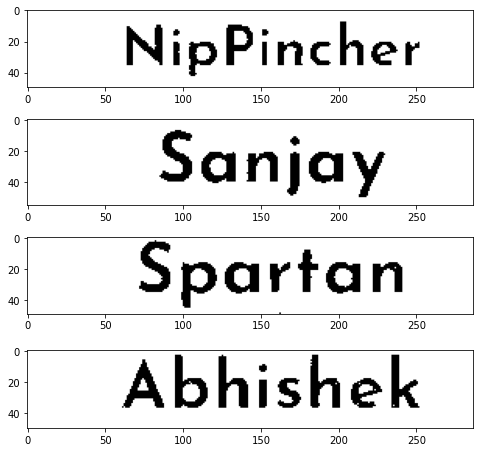

In [46]:
cropList = [thresholdName_1,thresholdName_2,thresholdName_3,thresholdName_4]
plotImages(cropList)

# 7 - Change threshhold for wealth.

In [47]:
retval, thresholdWealth_1 = cv2.threshold(cropWealth_1,tw,255,cv2.THRESH_BINARY)
retval, thresholdWealth_2 = cv2.threshold(cropWealth_2,tw,255,cv2.THRESH_BINARY)
retval, thresholdWealth_3 = cv2.threshold(cropWealth_3,tw,255,cv2.THRESH_BINARY)
retval, thresholdWealth_4 = cv2.threshold(cropWealth_4,tw,255,cv2.THRESH_BINARY)

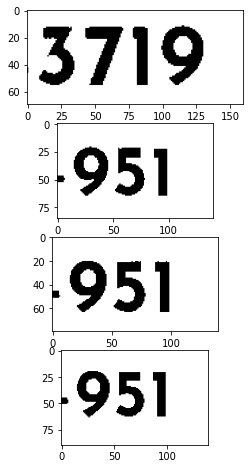

In [48]:
cropList = [thresholdWealth_1,thresholdWealth_2,thresholdWealth_3,thresholdWealth_4]
plotImages(cropList)

# 8 - Write edited images for preview.

In [10]:
"""
cv2.imwrite("w1.jpg",thresholdWealth_1)
cv2.imwrite("w2.jpg",thresholdWealth_2)
cv2.imwrite("w3.jpg",thresholdWealth_3)
cv2.imwrite("w4.jpg",thresholdWealth_4)
"""

'\ncv2.imwrite("w1.jpg",thresholdWealth_1)\ncv2.imwrite("w2.jpg",thresholdWealth_2)\ncv2.imwrite("w3.jpg",thresholdWealth_3)\ncv2.imwrite("w4.jpg",thresholdWealth_4)\n'

In [11]:
name_1 = pytesseract.image_to_string(thresholdName_1)
name_2 = pytesseract.image_to_string(thresholdName_2)
name_3 = pytesseract.image_to_string(thresholdName_3)
name_4 = pytesseract.image_to_string(thresholdName_4)

# 9 - Force pytesseract to read numbers using the pre-config 'outputbase digits'.

In [12]:
custom_config = r'--oem 3 --psm 6 outputbase digits'

wealth_1 = pytesseract.image_to_string(thresholdWealth_1, config=custom_config)
wealth_2 = pytesseract.image_to_string(thresholdWealth_2, config=custom_config)
wealth_3 = pytesseract.image_to_string(thresholdWealth_3, config=custom_config)
wealth_4 = pytesseract.image_to_string(thresholdWealth_4, config=custom_config)

# 10 - Manual correction for misread -ve sign.

In [13]:

wealth_1 = int(wealth_1)
wealth_2 = -abs(int(wealth_2))
wealth_3 = -abs(int(wealth_3))
wealth_4 = -abs(int(wealth_4))

# 11 - Add read data and ranks to csv.

In [14]:
#Add read data to csv.
data = pd.read_csv(dataCSV)
names = ["Game No",name_1,name_2,name_3,name_4]
wealths = [(len(data["Game No"])+1),wealth_1,wealth_2,wealth_3,wealth_4]
ocrData = pd.DataFrame([wealths],columns=names)
mergedData_wealth = pd.concat([data, ocrData], join = "outer")
mergedData_wealth.to_csv(dataCSV, index=False)

#Add ranks to csv.
data_r = pd.read_csv(rankCSV)

In [15]:
rank_1 = 1
rank_2 = 2
rank_3 = 3
rank_4 = 4

ranks = [(len(data_r["Game No"])+1),rank_1,rank_2,rank_3,rank_4]
ocrRank = pd.DataFrame([ranks],columns=names)
mergedData_rank = pd.concat([data_r, ocrRank], join = "outer")
mergedData_rank.to_csv(rankCSV, index=False)

# 12 - Calculate wins and win-ratio

In [16]:
#Calculate wins and win-ratio
players = ["Sanjay", "thamarmo", "Abhishek", "Shishtaouk", "NipPincher", "Diraj", "SugaDaddy", "Spartan"]
data_r = pd.read_csv(rankCSV)
winRatio = []
wins =[]
played = []
losses = []

# 13 - Check for new files and update tables

In [17]:
for i in players:
    gamesPlayed= data_r[i].value_counts().sum()
    played.append(gamesPlayed)
    if 1 in data_r[i].unique():
        win = data_r[i].value_counts()[1]
        wins.append(win)
        wr = ((win/gamesPlayed*100).round(2))
        winRatio.append(wr)
    else:
        winRatio.append(0)
        wins.append(0)
for i in range(len(played)):
    losses.append(played[i]-wins[i])
winLoss = pd.DataFrame(list(zip(players, wins, played,losses,winRatio)), 
               columns =['Names', 'Wins', 'Played', 'Lost', 'winRatio'])
winLoss.to_csv(r'winLoss.csv', index = False) 


In [18]:
winLoss

Names  Wins  Played  Lost  winRatio
0      Sanjay    25      71    46     35.21
1    thamarmo     5      28    23     17.86
2    Abhishek    21      78    57     26.92
3  Shishtaouk     3       7     4     42.86
4  NipPincher     6      22    16     27.27
5       Diraj     3      26    23     11.54
6   SugaDaddy    14      48    34     29.17
7     Spartan    13      47    34     27.66